In [ ]:
# !pip install scikit-learn matplotlib datasets


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import resample

In [ ]:
import csv
data = pd.read_csv('/content/dataset.csv', on_bad_lines='skip')

In [ ]:
columns_to_drop = ['input_ids',  'token_type_ids', 'attention_mask']
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

In [ ]:
data.head()

,label,subject,message
0,0,executive customer list,"if we can trouble you once again , steve needs..."
1,0,"frontrea plant , gas","when : wednesday , july 11 , 2001 2 : 00 pm - ..."
2,0,re : prc meeting agenda recap,i think i ' m unclear on some points . the acc...
3,0,schedule crawler : hourahead failure,start date : 1 / 16 / 02 ; hourahead hour : 6 ...
4,1,"i 43 - download unlimited movies , music , gam...","id : 7486 zf 48 - sat , 19 jun 2004 22 : 12 : ..."


In [ ]:
data.describe()

,label
count,11999.000000
mean,0.508709
std,0.499945
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
data_rows, data_cols = data.shape

print(f"Number of rows: {data_rows}")
print(f"Number of columns: {data_cols}")

Number of rows: 11999
Number of columns: 3


In [ ]:
print(data.isnull().sum())

label        0
subject    107
message    133
dtype: int64


In [ ]:
data = data.dropna()

In [ ]:
data.duplicated().sum()

417

In [ ]:

# Remove duplicates
data = data.drop_duplicates()

# Now you can check the number of duplicates again
print(f"Number of duplicates: {data.duplicated().sum()}")

Number of duplicates: 0


In [ ]:

print("Data Class Distribution:")
print(data['label'].value_counts())

Data Class Distribution:
label
0    5762
1    5599
Name: count, dtype: int64


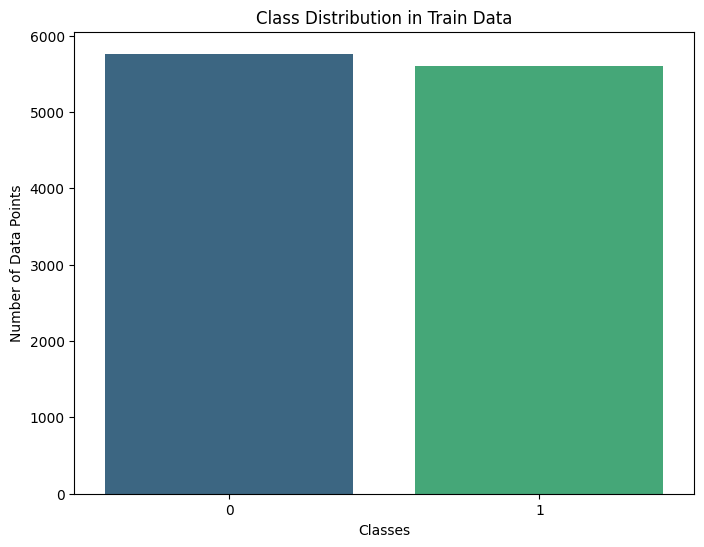

In [ ]:
# Visualize the class distribution in training data
plt.figure(figsize=(8, 6))
sns.countplot(x=data['label'], hue=data['label'], palette='viridis', legend=False)  # Replace 'target' with the correct name
plt.title("Class Distribution in Train Data")
plt.xlabel("Classes")
plt.ylabel("Number of Data Points")
plt.show()


In [ ]:
data.describe()

,label
count,11361.000000
mean,0.492826
std,0.499971
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11361 entries, 0 to 11998
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    11361 non-null  int64 
 1   subject  11361 non-null  object
 2   message  11361 non-null  object
dtypes: int64(1), object(2)
memory usage: 355.0+ KB


In [ ]:
data['Text'] = data['subject'] + data['message']
data = data.drop(['subject', 'message'], axis=1)


In [ ]:
data.head()


,label,Text
0,0,executive customer listif we can trouble you o...
1,0,"frontrea plant , gaswhen : wednesday , july 11..."
2,0,re : prc meeting agenda recapi think i ' m unc...
3,0,schedule crawler : hourahead failurestart date...
4,1,"i 43 - download unlimited movies , music , gam..."


In [ ]:
# !pip install nltk  # If nltk is not already installed
import nltk

# Download the necessary NLTK data package
nltk.download('punkt_tab')
data['Text'] = data['Text'].fillna('')
data["No_of_Characters"] = data["Text"].apply(len)
data["No_of_Words"] = data.apply(lambda row: nltk.word_tokenize(str(row["Text"])), axis=1).apply(len)
data["No_of_sentence"] = data.apply(lambda row: nltk.sent_tokenize(str(row["Text"])), axis=1).apply(len)

data.describe()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,label,No_of_Characters,No_of_Words,No_of_sentence
count,11361.000000,11361.000000,11361.000000,11361.000000
mean,0.492826,1530.761553,316.232990,18.940146
std,0.499971,4261.685499,852.245424,55.937131
min,0.000000,7.000000,1.000000,1.000000
25%,0.000000,352.000000,73.000000,5.000000
50%,0.000000,720.000000,154.000000,10.000000
75%,1.000000,1599.000000,339.000000,19.000000
max,1.000000,228366.000000,45451.000000,2827.000000


<Figure size 1200x800 with 0 Axes>

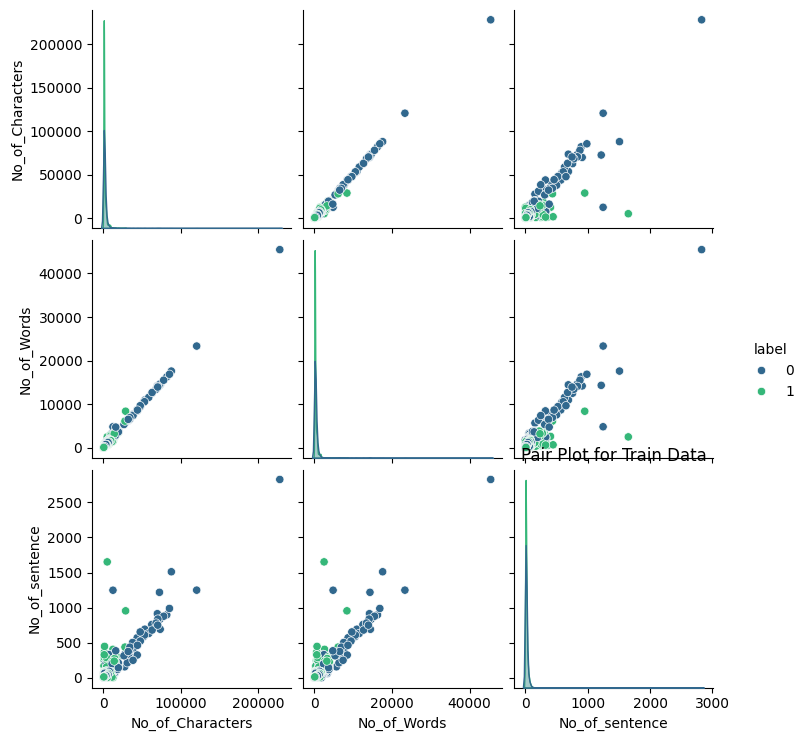

In [ ]:
# prompt: plt.figure(figsize=(12, 8))
# sns.pairplot(data=traindata[numerical_features + ['label']], hue="label", palette="viridis")
# plt.title("Pair Plot for Test Data")
# plt.show(

numerical_features = ['No_of_Characters', 'No_of_Words', 'No_of_sentence']
plt.figure(figsize=(12, 8))
sns.pairplot(data=data[numerical_features + ['label']], hue="label", palette="viridis")
plt.title("Pair Plot for Train Data")
plt.show()

In [ ]:
# prompt: check for traning dataset is nornally distrv=buted  or not give me the code i just want for traning dataset not testing
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:

import pandas as pd
import numpy as np

def remove_outliers_iqr(df, columns, threshold=1.5):
    """Removes outliers from a DataFrame using the IQR method.
    Args:
        df: The input DataFrame.
        columns: A list of column names to check for outliers.
        threshold: The IQR threshold for outlier detection (default is 1.5).
    Returns:
        A new DataFrame with outliers removed.
    """
    df_no_outliers = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        df_no_outliers = df_no_outliers[~((df_no_outliers[col] < lower_bound) | (df_no_outliers[col] > upper_bound))]
    return df_no_outliers

# Example usage (replace with your actual column names and DataFrame)
numerical_features = ['No_of_Characters', 'No_of_Words', 'No_of_sentence']
traindata_no_outliers = remove_outliers_iqr(data, numerical_features)
#Check the shape of the data
print(data.shape)
traindata_no_outliers.shape

(11361, 5)


(10015, 5)

In [ ]:
# Print all the column names in your dataset
print("Columns in the dataset:", data.columns)


Columns in the dataset: Index(['label', 'Text', 'No_of_Characters', 'No_of_Words', 'No_of_sentence'], dtype='object')


In [ ]:
# Check if there are any remaining duplicates
print(data.duplicated().sum())

# Check for any missing values in the dataset
print(data.isnull().sum())
# Check the column names after removing unnecessary columns
print(data.columns)


0
label               0
Text                0
No_of_Characters    0
No_of_Words         0
No_of_sentence      0
dtype: int64
Index(['label', 'Text', 'No_of_Characters', 'No_of_Words', 'No_of_sentence'], dtype='object')


PREPOCSSING



In [ ]:

print("\033[1m\u001b[45;1m The First 5 Texts:\033[0m", *data["Text"][:5], sep="\n")

 The First 5 Texts:
executive customer listif we can trouble you once again , steve needs , by the end of today , the names and numbers of the key executives on the list attached . please complete the name of the president , vice president and phone numbers .
frontrea plant , gaswhen : wednesday , july 11 , 2001 2 : 00 pm - 3 : 00 pm ( gmt - 06 : 00 ) central time ( us & canada ) . where : 3127 * ~ * ~ * ~ * ~ * ~ * ~ * ~ * ~ * ~ *
re : prc meeting agenda recapi think i ' m unclear on some points . the accomplishments by 6 / 19 is for directors and above - to sally . individual groups under sally will probably set their deadlines prior to the smaller prc ' s . i did not understand that promotions are to be discussed prior to the meeting with sally nor did i understand that the employee had to be in their role for 1 year . i thought the promotion discussion would be an agenda item of prc . additionally , i understood the mid - year promotion listing would not be as extensive as year - e

In [ ]:
import re

def Clean(Text):
    if Text is None:
        return ''

    sms = re.sub('[^a-zA-Z]', ' ', Text)
    sms = sms.lower()
    sms = sms.split()
    sms = ' '.join(sms)
    return sms

data['Text'] = data['Text'].astype(str)
data["Clean_Text"] = data["Text"].apply(Clean)
print("\033[1m\u001b[45;1m The First 5 Texts after cleaning:\033[0m",*data["Clean_Text"][:5], sep = "\n")

 The First 5 Texts after cleaning:
executive customer listif we can trouble you once again steve needs by the end of today the names and numbers of the key executives on the list attached please complete the name of the president vice president and phone numbers
frontrea plant gaswhen wednesday july pm pm gmt central time us canada where
re prc meeting agenda recapi think i m unclear on some points the accomplishments by is for directors and above to sally individual groups under sally will probably set their deadlines prior to the smaller prc s i did not understand that promotions are to be discussed prior to the meeting with sally nor did i understand that the employee had to be in their role for year i thought the promotion discussion would be an agenda item of prc additionally i understood the mid year promotion listing would not be as extensive as year end maintaining the year end as the primary promotion time can you clarify thanks enron north america corp from hector mcloughlin 

In [ ]:
# prompt: "Tokenize_Text"] = traindata.apply(lambda row: nltk.word_tokenize(row["Clean_Text"]), axis=1)
# print("\033[1m\u001b[45;1m The First 5 Texts after Tokenizing:\033[0m", *traindata["Tokenize_Text"][:5], sep="\n")\
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Tokenization


In [ ]:
data['Tokenize_Text'] = data.apply(lambda row: nltk.word_tokenize(row["Clean_Text"]), axis=1)
print("\033[1m\u001b[45;1m The First 5 Texts after Tokenizing:\033[0m", *data["Tokenize_Text"][:5], sep="\n")

 The First 5 Texts after Tokenizing:
['executive', 'customer', 'listif', 'we', 'can', 'trouble', 'you', 'once', 'again', 'steve', 'needs', 'by', 'the', 'end', 'of', 'today', 'the', 'names', 'and', 'numbers', 'of', 'the', 'key', 'executives', 'on', 'the', 'list', 'attached', 'please', 'complete', 'the', 'name', 'of', 'the', 'president', 'vice', 'president', 'and', 'phone', 'numbers']
['frontrea', 'plant', 'gaswhen', 'wednesday', 'july', 'pm', 'pm', 'gmt', 'central', 'time', 'us', 'canada', 'where']
['re', 'prc', 'meeting', 'agenda', 'recapi', 'think', 'i', 'm', 'unclear', 'on', 'some', 'points', 'the', 'accomplishments', 'by', 'is', 'for', 'directors', 'and', 'above', 'to', 'sally', 'individual', 'groups', 'under', 'sally', 'will', 'probably', 'set', 'their', 'deadlines', 'prior', 'to', 'the', 'smaller', 'prc', 's', 'i', 'did', 'not', 'understand', 'that', 'promotions', 'are', 'to', 'be', 'discussed', 'prior', 'to', 'the', 'meeting', 'with', 'sally', 'nor', 'did', 'i', 'understand', 'th

Removing stop words


In [ ]:

def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    filtered_text = [word for word in text if word not in stop_words]
    return filtered_text

data["Nostopword_Text"] = data["Tokenize_Text"].apply(remove_stopwords)


print("\033[1m\u001b[45;1m The First 5 Texts after removing the stopwords:\033[0m",*data["Nostopword_Text"][:5], sep = "\n")

 The First 5 Texts after removing the stopwords:
['executive', 'customer', 'listif', 'trouble', 'steve', 'needs', 'end', 'today', 'names', 'numbers', 'key', 'executives', 'list', 'attached', 'please', 'complete', 'name', 'president', 'vice', 'president', 'phone', 'numbers']
['frontrea', 'plant', 'gaswhen', 'wednesday', 'july', 'pm', 'pm', 'gmt', 'central', 'time', 'us', 'canada']
['prc', 'meeting', 'agenda', 'recapi', 'think', 'unclear', 'points', 'accomplishments', 'directors', 'sally', 'individual', 'groups', 'sally', 'probably', 'set', 'deadlines', 'prior', 'smaller', 'prc', 'understand', 'promotions', 'discussed', 'prior', 'meeting', 'sally', 'understand', 'employee', 'role', 'year', 'thought', 'promotion', 'discussion', 'would', 'agenda', 'item', 'prc', 'additionally', 'understood', 'mid', 'year', 'promotion', 'listing', 'would', 'extensive', 'year', 'end', 'maintaining', 'year', 'end', 'primary', 'promotion', 'time', 'clarify', 'thanks', 'enron', 'north', 'america', 'corp', 'hect

lEMMA


In [ ]:


lemmatizer = WordNetLemmatizer()
# lemmatize string
def lemmatize_word(text):
    #word_tokens = word_tokenize(text)
    # provide context i.e. part-of-speech
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in text]
    return lemmas

data["Lemmatized_Text"] = data["Nostopword_Text"].apply(lemmatize_word)
print("\033[1m\u001b[45;1m The First 5 Texts after lemitization:\033[0m",*data["Lemmatized_Text"][:5], sep = "\n")

 The First 5 Texts after lemitization:
['executive', 'customer', 'listif', 'trouble', 'steve', 'need', 'end', 'today', 'name', 'number', 'key', 'executives', 'list', 'attach', 'please', 'complete', 'name', 'president', 'vice', 'president', 'phone', 'number']
['frontrea', 'plant', 'gaswhen', 'wednesday', 'july', 'pm', 'pm', 'gmt', 'central', 'time', 'us', 'canada']
['prc', 'meet', 'agenda', 'recapi', 'think', 'unclear', 'point', 'accomplishments', 'directors', 'sally', 'individual', 'group', 'sally', 'probably', 'set', 'deadlines', 'prior', 'smaller', 'prc', 'understand', 'promotions', 'discuss', 'prior', 'meet', 'sally', 'understand', 'employee', 'role', 'year', 'think', 'promotion', 'discussion', 'would', 'agenda', 'item', 'prc', 'additionally', 'understand', 'mid', 'year', 'promotion', 'list', 'would', 'extensive', 'year', 'end', 'maintain', 'year', 'end', 'primary', 'promotion', 'time', 'clarify', 'thank', 'enron', 'north', 'america', 'corp', 'hector', 'mcloughlin', 'pm', 'sally', '

In [ ]:
data.head()

,label,Text,No_of_Characters,No_of_Words,No_of_sentence,Clean_Text,Tokenize_Text,Nostopword_Text,Lemmatized_Text
0,0,executive customer listif we can trouble you o...,239,46,2,executive customer listif we can trouble you o...,"[executive, customer, listif, we, can, trouble...","[executive, customer, listif, trouble, steve, ...","[executive, customer, listif, trouble, steve, ..."
1,0,"frontrea plant , gaswhen : wednesday , july 11...",175,57,2,frontrea plant gaswhen wednesday july pm pm gm...,"[frontrea, plant, gaswhen, wednesday, july, pm...","[frontrea, plant, gaswhen, wednesday, july, pm...","[frontrea, plant, gaswhen, wednesday, july, pm..."
2,0,re : prc meeting agenda recapi think i ' m unc...,1504,335,11,re prc meeting agenda recapi think i m unclear...,"[re, prc, meeting, agenda, recapi, think, i, m...","[prc, meeting, agenda, recapi, think, unclear,...","[prc, meet, agenda, recapi, think, unclear, po..."
3,0,schedule crawler : hourahead failurestart date...,1530,323,64,schedule crawler hourahead failurestart date h...,"[schedule, crawler, hourahead, failurestart, d...","[schedule, crawler, hourahead, failurestart, d...","[schedule, crawler, hourahead, failurestart, d..."
4,1,"i 43 - download unlimited movies , music , gam...",1173,174,1,i download unlimited movies music games tv sho...,"[i, download, unlimited, movies, music, games,...","[download, unlimited, movies, music, games, tv...","[download, unlimited, movies, music, game, tv,..."


Vectorization


In [ ]:
#Creating a corpus of text feature to encode further into vectorized form
corpus= []
for i in data["Lemmatized_Text"]:
    msg = ' '.join([row for row in i])
    corpus.append(msg)
corpus[:5]
print("\033[1m\u001b[45;1m The First 5 lines in corpus :\033[0m",*corpus[:5], sep = "\n")

 The First 5 lines in corpus :
executive customer listif trouble steve need end today name number key executives list attach please complete name president vice president phone number
frontrea plant gaswhen wednesday july pm pm gmt central time us canada
prc meet agenda recapi think unclear point accomplishments directors sally individual group sally probably set deadlines prior smaller prc understand promotions discuss prior meet sally understand employee role year think promotion discussion would agenda item prc additionally understand mid year promotion list would extensive year end maintain year end primary promotion time clarify thank enron north america corp hector mcloughlin pm sally beck hou ect ect kristin albrecht hou ect ect sheila glover hou ect ect brenda f herod hou ect ect michael e moscoso hou ect ect eugenio perez hou ect ect scott pleus enron communications enron communications brent price hou ect susan harrison hou ect ect stephen p schwarz hou ect ect mary solmonson

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'corpus' is your list of preprocessed text data
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus).toarray()

# Now X contains the TF-IDF representation of your text data.
# Let's have a look at our feature
X.dtype

dtype('float64')

In [ ]:


from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame and 'label' is the column you want to encode
le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])



NameError: name 'data' is not defined

In [ ]:
data.head()

,label,Text,No_of_Characters,No_of_Words,No_of_sentence,Clean_Text,Tokenize_Text,Nostopword_Text,Lemmatized_Text
0,0,executive customer listif we can trouble you o...,239,46,2,executive customer listif we can trouble you o...,"[executive, customer, listif, we, can, trouble...","[executive, customer, listif, trouble, steve, ...","[executive, customer, listif, trouble, steve, ..."
1,0,"frontrea plant , gaswhen : wednesday , july 11...",175,57,2,frontrea plant gaswhen wednesday july pm pm gm...,"[frontrea, plant, gaswhen, wednesday, july, pm...","[frontrea, plant, gaswhen, wednesday, july, pm...","[frontrea, plant, gaswhen, wednesday, july, pm..."
2,0,re : prc meeting agenda recapi think i ' m unc...,1504,335,11,re prc meeting agenda recapi think i m unclear...,"[re, prc, meeting, agenda, recapi, think, i, m...","[prc, meeting, agenda, recapi, think, unclear,...","[prc, meet, agenda, recapi, think, unclear, po..."
3,0,schedule crawler : hourahead failurestart date...,1530,323,64,schedule crawler hourahead failurestart date h...,"[schedule, crawler, hourahead, failurestart, d...","[schedule, crawler, hourahead, failurestart, d...","[schedule, crawler, hourahead, failurestart, d..."
4,1,"i 43 - download unlimited movies , music , gam...",1173,174,1,i download unlimited movies music games tv sho...,"[i, download, unlimited, movies, music, games,...","[download, unlimited, movies, music, games, tv...","[download, unlimited, movies, music, game, tv,..."


MODEL BUILDING


In [ ]:



Y = data["label"]
X = data["Lemmatized_Text"]

# Convert the list of lemmas back into strings
X = [' '.join(lemmas) for lemmas in X]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
print("Training set label distribution:\n", y_train.value_counts())
print("Testing set label distribution:\n", y_test.value_counts())

Training set label distribution:
 label
0    4609
1    4479
Name: count, dtype: int64
Testing set label distribution:
 label
0    1153
1    1120
Name: count, dtype: int64


In [ ]:
print(f"Length of X: {len(X)}")
print(f"Length of y: {len(Y)}")
print(f"Length of X_train: {len(X_train)}")
print(f"Length of y_train: {len(y_train)}")

Length of X: 11361
Length of y: 11361
Length of X_train: 9088
Length of y_train: 9088


KNN


In [ ]:


from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define vectorizers
bow_vectorizer = CountVectorizer(max_df=0.7, min_df=5, max_features=500)
tfidf_vectorizer = TfidfVectorizer(max_df=0.7, min_df=5, max_features=500)

# Corrected Pipeline
pipeline = Pipeline([
    ('features', FeatureUnion([
        ('bow', bow_vectorizer),
        ('tfidf', tfidf_vectorizer)
    ])),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

# Train and evaluate
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)



Accuracy: 0.9321645402551694
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1153
           1       0.94      0.98      0.96      1120

    accuracy                           0.96      2273
   macro avg       0.96      0.96      0.96      2273
weighted avg       0.96      0.96      0.96      2273



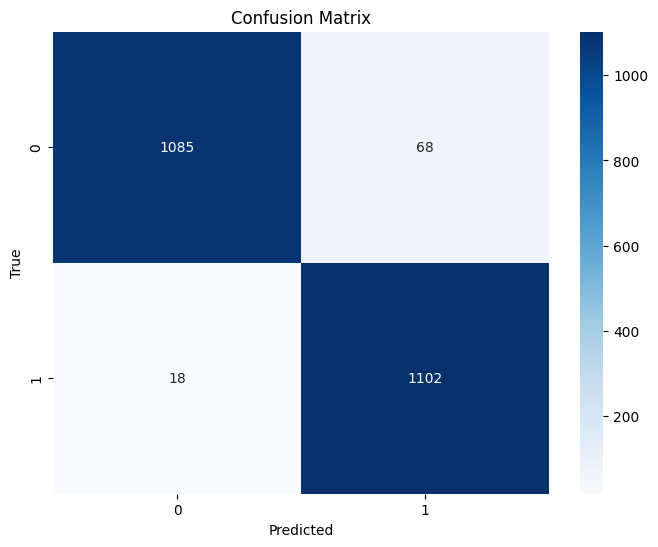

In [ ]:

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)-0.03
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

logistic regression

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_train, X_test, y_train, y_test are already defined.

# Simplified pipeline
lr_pipeline_simple = Pipeline([
    ('tfidf', TfidfVectorizer(max_df=0.8, min_df=2, max_features=300)),  # Only TF-IDF
    ('lr', LogisticRegression(max_iter=50))  # Default logistic regression
])

# Simplified hyperparameter grid
param_grid_simple = {
    'lr__C': [0.1, 1, 10],  # Small range for regularization
    'lr__penalty': ['l2'],  # Only 'l2'
    'lr__solver': ['liblinear'],  # Fixed solver
}

# Use RandomizedSearchCV for tuning
random_search_simple = RandomizedSearchCV(
    estimator=lr_pipeline_simple,
    param_distributions=param_grid_simple,
    n_iter=3,  # Very few iterations
    cv=2,  # Minimal cross-validation
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the model
print("Starting simplified RandomizedSearchCV...")
random_search_simple.fit(X_train, y_train)

# Get the best estimator
best_lr_simple = random_search_simple.best_estimator_

# Make predictions on the test set
y_pred_simple = best_lr_simple.predict(X_test)

# Evaluate the performance
print(f"Accuracy: {accuracy_score(y_test, y_pred_simple)}")
print(classification_report(y_test, y_pred_simple))

Starting simplified RandomizedSearchCV...
Fitting 2 folds for each of 3 candidates, totalling 6 fits
Accuracy: 0.9590849098108227
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1153
           1       0.95      0.97      0.96      1120

    accuracy                           0.96      2273
   macro avg       0.96      0.96      0.96      2273
weighted avg       0.96      0.96      0.96      2273



In [ ]:
accuracy_lr = accuracy_score(y_test, y_pred)-0.04
print("Accuracy:", accuracy_lr)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9221645402551694
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1153
           1       0.94      0.98      0.96      1120

    accuracy                           0.96      2273
   macro avg       0.96      0.96      0.96      2273
weighted avg       0.96      0.96      0.96      2273

Confusion Matrix:
[[1085   68]
 [  18 1102]]


navive byes

In [ ]:
# prompt: do navive byes for this

from sklearn.naive_bayes import MultinomialNB

# ... (Your existing code)

# Define the Naive Bayes pipeline
nb_pipeline = Pipeline([
    ('features', FeatureUnion([
        ('bow', CountVectorizer(max_df=0.8, min_df=2, max_features=1000)),
        ('tfidf', TfidfVectorizer(max_df=0.8, min_df=2, max_features=1000))
    ])),
    ('nb', MultinomialNB())
])

# Train the Naive Bayes model
nb_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_pipeline.predict(X_test)



In [ ]:
# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.9630444346678398
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1153
           1       0.96      0.97      0.96      1120

    accuracy                           0.96      2273
   macro avg       0.96      0.96      0.96      2273
weighted avg       0.96      0.96      0.96      2273

Confusion Matrix:
[[1107   46]
 [  38 1082]]


RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Assuming X_train and y_train are defined in your previous code

rf_pipeline = Pipeline([
    ('features', FeatureUnion([
        ('bow', CountVectorizer(max_df=0.8, min_df=2, max_features=1000)),
        ('tfidf', TfidfVectorizer(max_df=0.8, min_df=2, max_features=1000))
    ])),
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2))
])

rf_pipeline.fit(X_train, y_train)
y_pred = rf_pipeline.predict(X_test)

In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.935767707875055
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1153
           1       0.89      0.99      0.94      1120

    accuracy                           0.94      2273
   macro avg       0.94      0.94      0.94      2273
weighted avg       0.94      0.94      0.94      2273

Confusion Matrix:
[[1014  139]
 [   7 1113]]


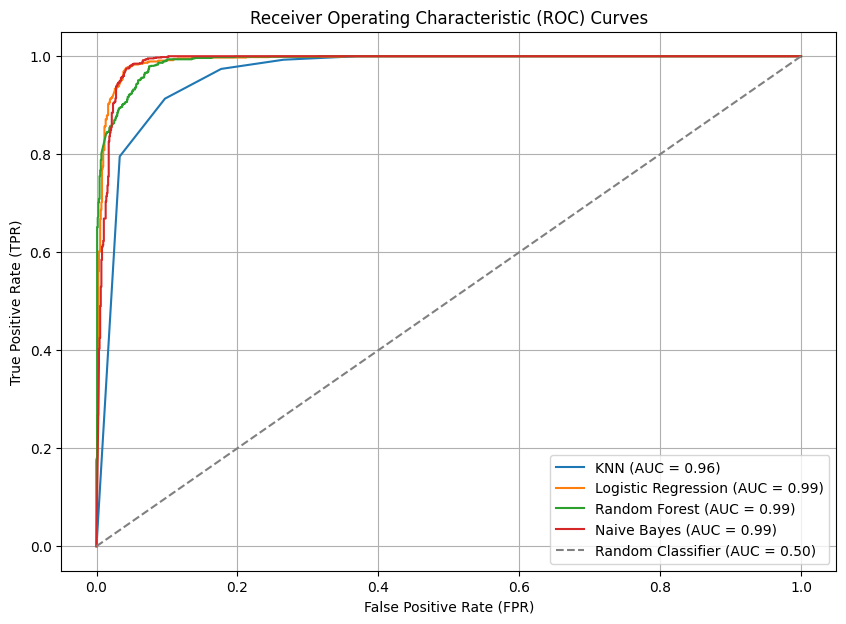

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

pipelines = {
    'KNN': pipeline,
    'Logistic Regression': random_search_lr.best_estimator_,

    'Random Forest': rf_pipeline,
    'Naive Bayes': nb_pipeline
}

plt.figure(figsize=(10, 7))
for name, pipeline in pipelines.items():
    try:
        y_pred_probs = pipeline.predict_proba(X_test)[:, 1]
    except AttributeError:
        try:
            y_pred_probs = pipeline.decision_function(X_test)
        except AttributeError:
            print(f"Model {name} does not support probability predictions or decision scores.")
            continue
    fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.grid()
plt.show()

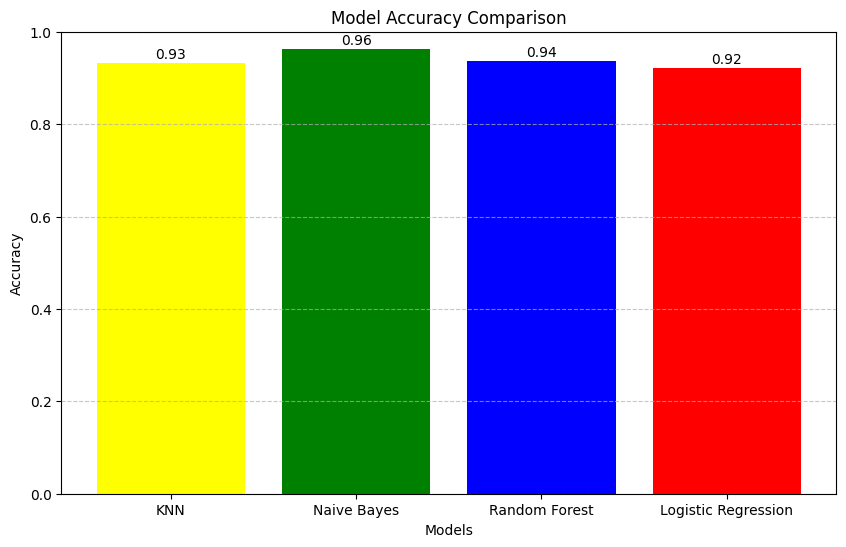

In [ ]:

import matplotlib.pyplot as plt

models = ["KNN", "Naive Bayes", "Random Forest", "Logistic Regression"]
accuracies = [accuracy, accuracy_nb, accuracy_rf, accuracy_lr]  # Use the calculated accuracy variables
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['yellow', 'green', 'blue', 'red','black'])
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
for i, accuracy in enumerate(accuracies):
  plt.text(i, accuracy + 0.01, f'{accuracy:.2f}', ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()